# Übung: Erste Schritte mit NetworkX und Zentralitäten

**Notwendige Python Pakete**

In [1]:
#!pip install networkx
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install itables

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

## Zacharies Karate Club

This is the well-known and much-used Zachary karate club network. The data was collected from the members of a university karate club by Wayne Zachary in 1977. Each node represents a member of the club, and each edge represents a tie between two members of the club. The network is undirected. An often discussed problem using this dataset is to find the two groups of people into which the karate club split after an argument between two teachers. 

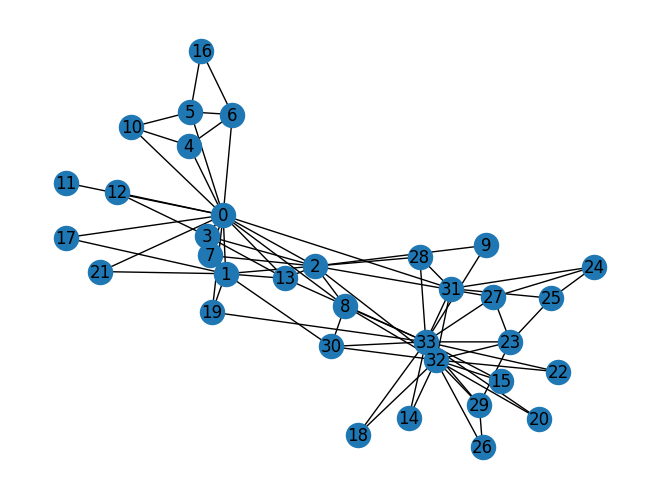

In [3]:
g = nx.karate_club_graph()

nx.draw(g, with_labels=True)

## Zentralitäten

Berechnen Sie Degree, Betweenness, Closeness und Eigenvektor Zentralität.

- https://networkx.org/documentation/stable/reference/algorithms/centrality.html

Stellen Sie das Ergebnis als Tabelle da. 

In [4]:
dc = nx.degree_centrality(g)
bc = nx.betweenness_centrality(g)
cc = nx.closeness_centrality(g)
evc = nx.eigenvector_centrality(g)

pd.DataFrame({
    'degree': dc,
    'closeness': cc,
    'betweenness': bc,
    'eigenvector': evc
})

degree  closeness  betweenness  eigenvector
0   0.484848   0.568966     0.437635     0.355483
1   0.272727   0.485294     0.053937     0.265954
2   0.303030   0.559322     0.143657     0.317189
3   0.181818   0.464789     0.011909     0.211174
4   0.090909   0.379310     0.000631     0.075966
5   0.121212   0.383721     0.029987     0.079481
6   0.121212   0.383721     0.029987     0.079481
7   0.121212   0.440000     0.000000     0.170955
8   0.151515   0.515625     0.055927     0.227405
9   0.060606   0.434211     0.000848     0.102675
10  0.090909   0.379310     0.000631     0.075966
11  0.030303   0.366667     0.000000     0.052854
12  0.060606   0.370787     0.000000     0.084252
13  0.151515   0.515625     0.045863     0.226470
14  0.060606   0.370787     0.000000     0.101406
15  0.060606   0.370787     0.000000     0.101406
16  0.060606   0.284483     0.000000     0.023635
17  0.060606   0.375000     0.000000     0.092397
18  0.060606   0.370787     0.000000     0.101406
19  0.090909   0.500000     0.032475     0.147911
20  0.060606   0.370787     0.000000     0.101406
21  0.060606   0.375000     0.000000     0.092397
22  0.060606   0.370787     0.000000     0.101406
23  0.151515   0.392857     0.017614     0.150123
24  0.090909   0.375000     0.002210     0.057054
25  0.090909   0.375000     0.003840     0.059208
26  0.060606   0.362637     0.000000     0.075582
27  0.121212   0.458333     0.022333     0.133479
28  0.090909   0.452055     0.001795     0.131079
29  0.121212   0.383721     0.002922     0.134965
30  0.121212   0.458333     0.014412     0.174760
31  0.181818   0.540984     0.138276     0.191036
32  0.363636   0.515625     0.145247     0.308651
33  0.515152   0.550000     0.304075     0.373371

## Netzwerkvisualisierung

Machen Sie sich mit den Funktionen *draw(G)* und *draw_spring(G)* vertraut.

- https://networkx.org/documentation/stable/reference/drawing.html
- https://networkx.org/documentation/stable/auto_examples/drawing/plot_node_colormap.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

Erstellen Sie eine Abbildung des Netzwerks mit: 

- Knotengröße korrespondiert mit Degree
- Betweenness Centrality wird als Farbskala dargestellt. 

*Tipp: Skalierung des Degrees* 

> dc = np.array(list(dc.values())) * 200

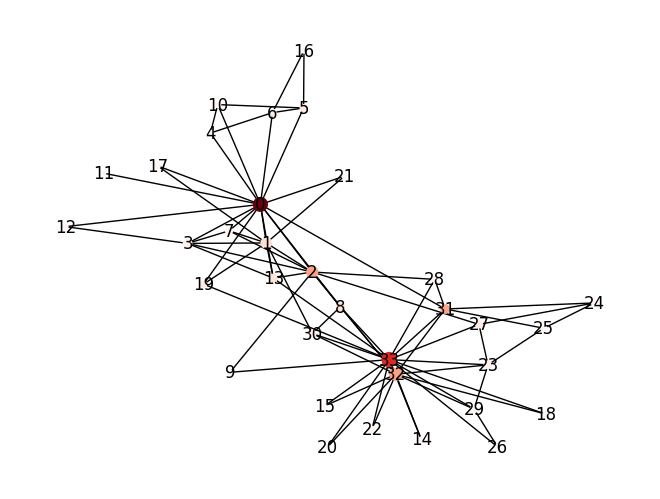

In [5]:
nx.draw_spring(g, 
               with_labels=True, 
               node_size=np.array(list(dc.values())) * 200,
               node_color=list(bc.values()),
               cmap=plt.cm.Reds
              )

## Twitter Follower Netzwerk von Bundestagsabgeordneten 2019

https://github.com/WZBSocialScienceCenter/mdb-twitter-network/

Wer sind die zentralen Personen?

In [6]:
import networkx as nx
friends = nx.read_gml('mdb_friends.gml')

Follower Netzwerke sind gerichtete Netzwerke, d.h. es muss zwischen eingehenden und ausgehenden Kanten 
unterschieden werden. Statt Eigenvector Centrality muss Katz Centrality verwendet werden.

In [7]:
dc = nx.degree_centrality(friends)
bc = nx.betweenness_centrality(friends)
cc = nx.closeness_centrality(friends)
kc = nx.katz_centrality(friends)

pd.DataFrame({
    'in_degree': dc,
    'closeness': cc,
    'betweenness': bc,
    'katz': kc
})

in_degree  closeness  betweenness      katz
martinschulz      0.016667   0.000000     0.000000  0.000705
katarinabarley    0.502778   0.002778     0.000538  0.000775
oezoguz           0.333333   0.005556     0.000301  0.000853
kahrs             0.536111   0.008333     0.000735  0.000938
schneidercar      0.394444   0.011111     0.000422  0.001032
...                    ...        ...          ...       ...
witt_uwe          0.055556   0.128049     0.000000  0.014962
chrwirthmdb       0.013889   0.038647     0.000000  0.001311
m_reichardt_afd   0.036111   0.107344     0.000000  0.007186
drfriesenmdb      0.016667   0.083235     0.000000  0.004096
gydej             0.047222   0.090090     0.000000  0.013643

[361 rows x 4 columns]

In [8]:
friends